## Importing Data and Cleaning

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

wk4 = pd.read_csv('Intermediate-Data/Week_4_data.csv')
stemr = pd.read_csv('Intermediate-Data/FUllyMergedDataset.csv')
idkey = pd.read_csv('Intermediate-Data/ID Key-6-3-18.csv')
idkey2 = pd.read_csv('Intermediate-Data/username to id.csv')
idkey = idkey.rename(columns ={'ID':'AnonID'})
idkey2 = idkey2.rename(columns ={'Student Id':'AnonID'})


C:\Users\Lynn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (31,77,79,80,83,85,86,138,146,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,226,227,266,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,311,313,316) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Lynn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (64,113,118,150,156,161,193,267,316,317,456,458,503,572,605,607,648,649,651,653,658,660,662,664,673,674,719,720,722,723,724,725,800,801,804,805,806,808,809,810,811,812,813,814,815,816,817,828,829,830,831,833,

In [91]:
len(wk4)

1282

In [93]:
mathgrdstr = ['M126FirstGrade2','M128FirstGrade2','M129FirstGrade2','M153FirstGrade2','M154FirstGrade2',
             'M155FirstGrade2','M156FirstGrade2']
mathstr = ['M126ClassStr','M128ClassStr','M129ClassStr','M153ClassStr','M154ClassStr',
             'M155ClassStr','M156ClassStr']


In [95]:

for n in range(0,len(mathstr)):
    stemr[mathgrdstr[n]] = stemr[mathstr[n]].astype(str).str[0]


In [96]:
stemr['P111FirstGrade'] = stemr['P111FirstGrade'].astype(str).str[0]
stemr['Cal1FirstGrade'] = stemr['Cal1FirstGrade'].astype(str).str[0]

In [97]:
stemr2 = stemr[[    'AnonID',
                    'High.School.GPA',
                    'ACTSATMathPercentile',
                    'ACTSATVerbalPercentile',
                    'Sem1GPA','P111FirstGrade','Cal1FirstGrade','P112FirstGrade'   ]]


In [98]:
stemr3 = pd.merge(stemr2,idkey2, on = 'AnonID')

In [99]:
data = pd.merge(wk4, stemr3, on = 'Username')
data = pd.merge(data, survey, on = 'Username')


In [100]:
data = data[pd.notnull(data['P112FirstGrade'])]
data['P112FirstGrade1'] = data.loc[:,'P112FirstGrade'].astype(str).str[0]

data["FinalCourseGradeAB_Rest1"] = np.where(data['P112FirstGrade1'] == "A",1,0)
data["FinalCourseGradeAB_Rest1"] = np.where(data['P112FirstGrade1'] == "B",1,data['FinalCourseGradeAB_Rest1'])

data['Cal1FirstGradeNUM'] = 0

data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "A",4,0)
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "B",3,data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "C",2,data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "D",1,data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "W",-1,data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "n",data['Sem1GPA'].round(1),data['Cal1FirstGradeNUM'])
data['Cal1FirstGradeNUM'] = np.where(data['Cal1FirstGrade'] == "P",data['Sem1GPA'].round(1),data['Cal1FirstGradeNUM'])

data['P111FirstGradeNUM'] = 0

data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "A",4,0)
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "B",3,data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "C",2,data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "D",1,data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "W",-1,data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "n",data['Sem1GPA'].round(1),data['P111FirstGradeNUM'])
data['P111FirstGradeNUM'] = np.where(data['P111FirstGrade'] == "P",data['Sem1GPA'].round(1),data['P111FirstGradeNUM'])

In [101]:
data['TakeCSEM'] = np.where(data['TakeCSEM'] == "Y", 1,0)

In [102]:
data['High.School.GPA'] = pd.to_numeric(data['High.School.GPA'], errors = "coerce")
data['TakeCSEM'] = pd.to_numeric(data['TakeCSEM'], errors = "coerce")
data2 = data[pd.notnull(data['High.School.GPA'])]
data2 = data2[pd.notnull(data2['ACTSATMathPercentile'])]
data2 = data2[pd.notnull(data2['ACTSATVerbalPercentile'])]
data2 = data2[pd.notnull(data2['Sem1GPA'])]

In [103]:
data2.columns[data2.isnull().any()].tolist()

['LabQ1',
 'Lab2',
 'LabQ2',
 'Lab3',
 'Lab4',
 'MCTest1',
 'SBonus1',
 'SBonus2',
 'SBonus3',
 'FHwk2',
 'LecQ1',
 'LecQ5',
 'LecQ9',
 'Lab2Miss',
 'Lab3Miss',
 'Lab4Miss',
 'Lec1Miss',
 'Lec5Miss',
 'Lec9Miss']

In [104]:
wk4 = data2

In [105]:
wk4 = pd.DataFrame(wk4)


In [106]:
wk4.columns[wk4.isnull().any()].tolist()

['LabQ1',
 'Lab2',
 'LabQ2',
 'Lab3',
 'Lab4',
 'MCTest1',
 'SBonus1',
 'SBonus2',
 'SBonus3',
 'FHwk2',
 'LecQ1',
 'LecQ5',
 'LecQ9',
 'Lab2Miss',
 'Lab3Miss',
 'Lab4Miss',
 'Lec1Miss',
 'Lec5Miss',
 'Lec9Miss']

In [108]:
pd.crosstab(index = wk4['LecQ1'], columns = "count")

col_0,count
LecQ1,
0.0,35
2.0,293


## Making New Columns For Analysis

In [109]:
import re

regLecMis = re.compile(".*(Lec)\d(Miss).*")
lecmis = [m.group(0) for l in list(wk4) for m in[regLecMis.search(l)] if m]
regSB = re.compile(".*(SBonus)\d.*")
SBonus = [m.group(0) for l in list(wk4) for m in[regSB.search(l)] if m]
wk4['BonusPoints'] = wk4[SBonus].sum(axis = 1, skipna = True)

In [110]:
wk4['MissedLectures'] = wk4[lecmis].sum(axis = 1, skipna = True)
#Sum over the missed lectures

In [111]:
wk4['MissedAnyLectures'] = np.where(wk4['MissedLectures'] > 0, 1,0)
#wk4['TakeCSEM']

In [112]:


regex = re.compile(".*(LecQ).")
regLabQ = re.compile(".*(LabQ).")
regLab1 = re.compile(".*(Lab)\d.*")
regLab2 = re.compile("^\w{4,4}$")
regHw = re.compile(".*(FHwk).")
#Define what we want out of the string

lecQs = [m.group(0) for l in list(wk4) for m in[regex.search(l)] if m]
#Creates a list "lecQs" for all of the instances of Lecture Quiz http://www.cademuir.eu/blog/2011/10/20/python-searching-for-a-string-within-a-list-list-comprehension/
labQs = [m.group(0) for l in list(wk4) for m in[regLabQ.search(l)] if m]
labs = [m.group(0) for l in list(wk4) for m in[regLab1.search(l)] if m]
labs = [m.group(0) for l in list(labs) for m in[regLab2.search(l)] if m]
Fhwks = [m.group(0) for l in list(wk4) for m in[regHw.search(l)] if m]

In [113]:
wk4[lecQs] = np.where(wk4[lecQs] < 0, 0,wk4[lecQs])
wk4['LecQGrade'] = wk4[lecQs].mean(axis = 1, skipna = True)
#LecQAve
wk4['LabQGrade'] = wk4[labQs].mean(axis = 1, skipna = True)
wk4['HWGrade'] = wk4[Fhwks].mean(axis = 1, skipna = True)

In [114]:
wk4[labs] = np.where(wk4[labs] < 0, 0,wk4[labs])

In [116]:
list(wk4)

['Unnamed: 0',
 'Username',
 'LectureSection',
 'LabSection',
 'CourseAveNoDrop',
 'TstAve',
 'Lab1',
 'LabQ1',
 'CSEMPretestPercent',
 'Lab2',
 'LabQ2',
 'Lab3',
 'LabQ3',
 'Lab4',
 'LabQ4',
 'MCTest1',
 'SBonus1',
 'SBonus2',
 'SBonus3',
 'FinalCourseGrade',
 'FHwk1',
 'FHwk2',
 'FHwk3',
 'LecQ1',
 'LecQ2',
 'LecQ3',
 'LecQ4',
 'LecQ5',
 'LecQ6',
 'LecQ7',
 'LecQ8',
 'LecQ9',
 'LecQ10',
 'LecQ11',
 'LecQ12',
 'LabDay',
 'LabTime',
 'FinalCourseGrade2',
 'FinalCourseGradePF',
 'FinalCourseGradeAB_C_DF',
 'FinalCourseGradeAB_Rest',
 'TakeCSEM',
 'Lab1Miss',
 'Lab2Miss',
 'Lab3Miss',
 'Lab4Miss',
 'DidFHwk1',
 'DidFHwk2',
 'DidFHwk3',
 'Lec1Miss',
 'Lec2Miss',
 'Lec3Miss',
 'Lec4Miss',
 'Lec5Miss',
 'Lec6Miss',
 'Lec7Miss',
 'Lec8Miss',
 'Lec9Miss',
 'Lec10Miss',
 'Lec11Miss',
 'AnonID',
 'High.School.GPA',
 'ACTSATMathPercentile',
 'ACTSATVerbalPercentile',
 'Sem1GPA',
 'P111FirstGrade',
 'Cal1FirstGrade',
 'P112FirstGrade',
 'IsFall',
 'IsHonors',
 'Classification',
 'TAexperience',
 

# Optimal Model Class Dataset

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = [ 'LecQGrade', 'LabQGrade', 'HWGrade', 'MissedLectures', 'MissedAnyLectures', 'BonusPoints']

X = wk4[names2]
Y = wk4.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [118]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [119]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

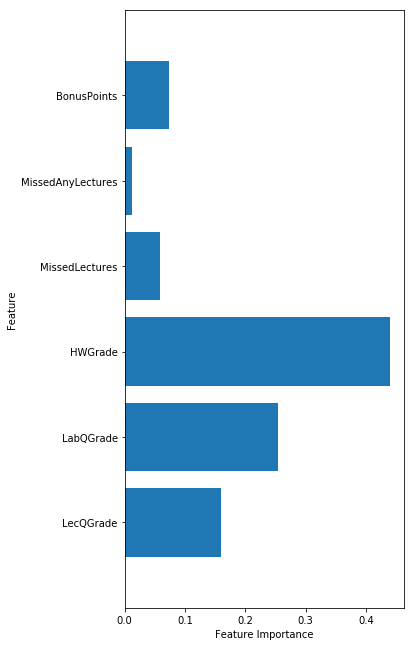

In [120]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [121]:
prediction = forest.predict(Xtest)

In [122]:
BLmeanAcc = 0.545191011236

In [123]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.806629834254


In [124]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.261438823018


In [125]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.604087244547


### Remove MissAnyLectures *** Optimal

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = [ 'LecQGrade', 'LabQGrade', 'HWGrade', 'MissedLectures', 'BonusPoints']

X = wk4[names2]
Y = wk4.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [127]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [128]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

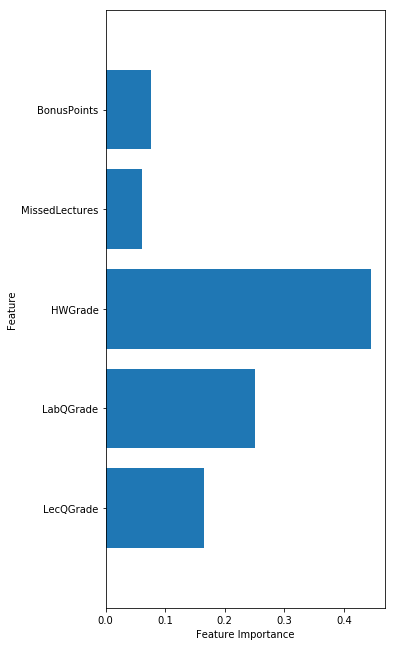

In [129]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [130]:
prediction = forest.predict(Xtest)

In [131]:
BLmeanAcc = 0.545191011236

In [132]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.795580110497


In [133]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.250389099261


In [134]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.583182921516


### Remove Missed Lectures *** Optimal

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = [ 'LecQGrade', 'LabQGrade', 'HWGrade', 'BonusPoints']

X = wk4[names2]
Y = wk4.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [136]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [137]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

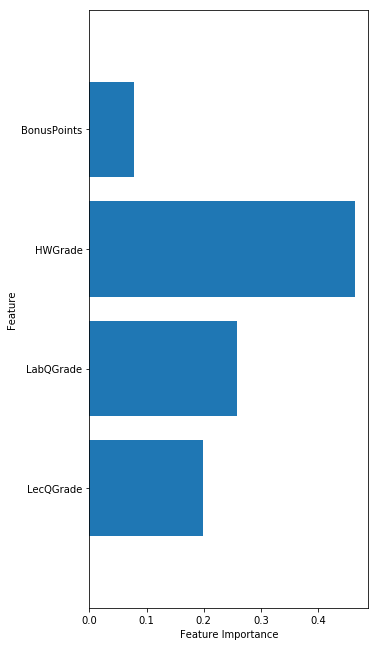

In [138]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [139]:
prediction = forest.predict(Xtest)

In [140]:
BLmeanAcc = 0.545191011236

In [141]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.78453038674


In [142]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.239339375504


In [143]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.558840072495


### Cut at 0.01

In [144]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = [ 'LecQGrade', 'LabQGrade', 'HWGrade']

X = wk4[names2]
Y = wk4.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [145]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [146]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

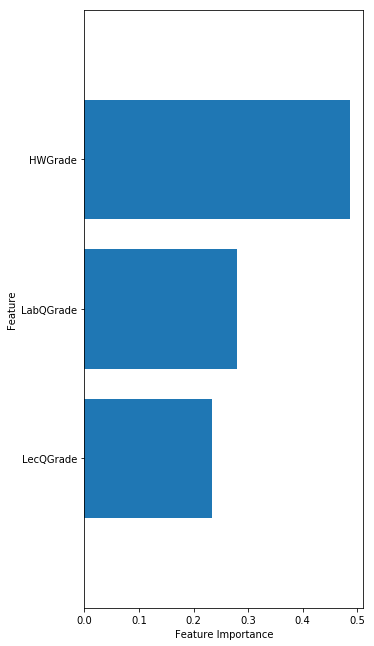

In [147]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [148]:
prediction = forest.predict(Xtest)

In [149]:
BLmeanAcc = 0.545191011236

In [150]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.812154696133


In [151]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.266963684897


In [152]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.613004653503


### Just HW grade

In [153]:
logreg = LogisticRegression()
X2 = Xtrain['HWGrade']
X3 = Xtest['HWGrade']

In [154]:
X2 = pd.DataFrame(X2)
X3 = pd.DataFrame(X3)

In [155]:
logreg.fit(X2, Ytrain.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [156]:
predictions = logreg.predict(X3)

In [157]:
accuracy_score(Ytest, predictions)

0.77900552486187846

In [158]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

names2 = ['HWGrade']

X = wk4[names2]
Y = wk4.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)

In [159]:
list(Y)

['FinalCourseGradeAB_Rest1']

In [160]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

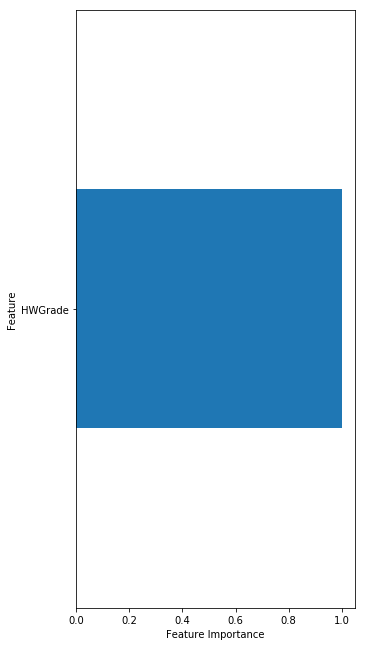

In [161]:
n_features = Xtrain.shape[1]

plt.figure(figsize=(5,11))
plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [162]:
prediction = forest.predict(Xtest)

In [163]:
BLmeanAcc = 0.545191011236

In [164]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.729281767956


In [165]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.18409075672


In [166]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.41937806874


## Layered Model with Demo-Variables

In [178]:
from sklearn.model_selection import train_test_split

names = [ 'LecQGrade', 'LabQGrade', 'HWGrade', 'MissedLectures', 'MissedAnyLectures', 'BonusPoints',"High.School.GPA","ACTSATMathPercentile",
         "ACTSATVerbalPercentile","Sem1GPA",
'P111FirstGradeNUM',"Cal1FirstGradeNUM"]

wk4['FinalCourseGradeAB_Rest1'] = np.where(wk4['FinalCourseGradeAB_Rest'] == "AB", 1,0)
#X = wk4.drop('FinalCourseGradeAB_Rest', axis = 1)
X = wk4[names]
Y = wk4.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)


print(Xtrain.dtypes)

LecQGrade                 float64
LabQGrade                 float64
HWGrade                   float64
MissedLectures            float64
MissedAnyLectures           int32
BonusPoints               float64
High.School.GPA           float64
ACTSATMathPercentile      float64
ACTSATVerbalPercentile    float64
Sem1GPA                   float64
P111FirstGradeNUM         float64
Cal1FirstGradeNUM         float64
dtype: object


### Evaluation of Best ML Algorithm

In [179]:
seed = 416
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#models.append(('KMeans',KMeans()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
results2 = []
results3 = []
results4 = []
names = []
names2 = []
names3 = []
names4 = []
scoring = 'accuracy'


for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtrain, Ytrain.values.ravel(), cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

for name2, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtest, Ytest.values.ravel(), cv=kfold, scoring=scoring)
	results2.append(cv_results)
	names2.append(name2)
	msg = "%s: %f (%f)" % (name2, cv_results.mean(), cv_results.std())
	print(msg)

from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score)

for name3, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtest, Ytest.values.ravel(), cv=kfold, scoring=kappa_scorer)
	results3.append(cv_results)
	names3.append(name3)
	msg = "%s: %f (%f)" % (name2, cv_results.mean(), cv_results.std())
	print(msg)

for name4, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtest, Ytest.values.ravel(), cv=kfold, scoring=kappa_scorer)
	results4.append(cv_results)
	names4.append(name4)
	msg = "%s: %f (%f)" % (name2, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.840476 (0.061214)
LDA: 0.838095 (0.067175)
KNN: 0.728571 (0.074688)
CART: 0.809524 (0.035315)
NB: 0.790476 (0.067175)
SVM: 0.738095 (0.062994)
RF: 0.821429 (0.066709)
LR: 0.816959 (0.083045)
LDA: 0.828070 (0.080744)
KNN: 0.735380 (0.108442)
CART: 0.718421 (0.111695)
NB: 0.790351 (0.072501)
SVM: 0.685673 (0.090135)


C:\Users\Lynn\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


RF: 0.795029 (0.096972)
RF: 0.567847 (0.193182)
RF: 0.605277 (0.182277)
RF: 0.354930 (0.282351)
RF: 0.362686 (0.280309)
RF: 0.491195 (0.184847)
RF: 0.172949 (0.193659)


C:\Users\Lynn\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


RF: 0.586660 (0.304310)
RF: 0.567847 (0.193182)
RF: 0.605277 (0.182277)
RF: 0.354930 (0.282351)
RF: 0.378675 (0.206032)
RF: 0.491195 (0.184847)
RF: 0.172949 (0.193659)


C:\Users\Lynn\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


RF: 0.633535 (0.209679)


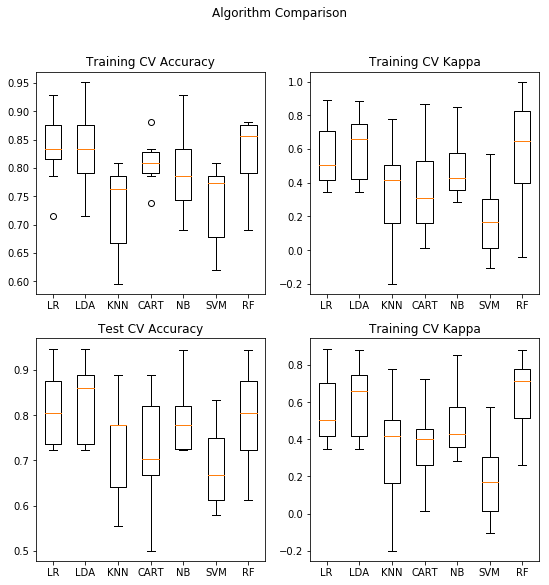

In [180]:
fig = plt.figure(figsize = (9,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(221)
plt.boxplot(results)
ax.set_xticklabels(names2)
plt.title("Training CV Accuracy")
ax = fig.add_subplot(223)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.title("Test CV Accuracy")
ax = fig.add_subplot(222)
plt.boxplot(results3)
ax.set_xticklabels(names2)
plt.title('Training CV Kappa')
ax = fig.add_subplot(224)
plt.boxplot(results4)
ax.set_xticklabels(names2)
plt.title("Training CV Kappa")
plt.show()

In [181]:
forest = RandomForestClassifier(n_estimators = 10000, random_state = 416)
forest.fit(Xtrain, Ytrain.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=416, verbose=0, warm_start=False)

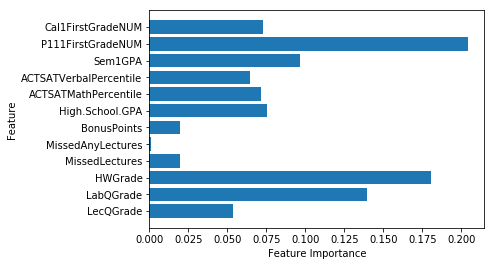

In [182]:
n_features = Xtrain.shape[1]


plt.barh(range(n_features), forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), list(Xtrain))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [183]:
prediction = forest.predict(Xtest)

In [184]:
names = ["High.School.GPA","ACTSATMathPercentile","ACTSATVerbalPercentile","Sem1GPA",
'P111FirstGradeNUM',"Cal1FirstGradeNUM"]

wk4['FinalCourseGradeAB_Rest1'] = np.where(wk4['FinalCourseGradeAB_Rest'] == "AB", 1,0)
#X = wk4.drop('FinalCourseGradeAB_Rest', axis = 1)
X = wk4[names]
Y = wk4.filter(['FinalCourseGradeAB_Rest1'], axis = 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X,Y, test_size = 0.3, random_state = 416)
demof = RandomForestClassifier(n_estimators = 10000, random_state = 416)
demof.fit(Xtrain, Ytrain.values.ravel())
pred = demof.predict(Xtest)
DemoAcc = accuracy_score(Ytest, pred)
print("Demo Baseline Accuracy: ", DemoAcc)

Demo Baseline Accuracy:  0.806629834254


In [185]:
forestAcc = accuracy_score(Ytest, prediction)
print("Accuracy: ",forestAcc)

Accuracy:  0.867403314917


In [186]:
forestAboveBaseline = forestAcc - BLmeanAcc
print("Improvement over baseline: ", forestAboveBaseline)

Improvement over baseline:  0.322212303681


In [187]:
forestAboveDemoBaseline = forestAcc - DemoAcc
print("Improvement of Adding Class Variables: ", forestAboveDemoBaseline)

Improvement of Adding Class Variables:  0.060773480663


In [188]:
forestKappa = cohen_kappa_score(Ytest,prediction)
print("Cohen's Kappa: ",forestKappa)

Cohen's Kappa:  0.705770793823
